In [1]:
YIELD CALCULATIONS for AMMONIA

SyntaxError: invalid syntax (1801993815.py, line 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [16]:
#this opens the file with the data and names it data 
data = pd.read_csv(r'C:\Users\gosse\Desktop\reseach project\data_ammoniaTOM2_csv.csv',sep=';')
time = [0, 1, 2, 2.75, 3.5, 4.25, 5, 5.5]
data

,WT0,WT1,WT2,WT3,WT4,WT5,WT6,WT7,MT0,MT1,MT2,MT3,MT4,MT5,MT6,MT7,BLANK
0,1.347448,1.287302,1.207040,1.245461,1.307518,1.292230,1.262057,1.181594,1.231179,1.184511,1.196279,1.236208,1.245763,1.200805,1.195474,1.181695,1.187729
1,1.316555,1.276864,1.211786,1.236971,1.287240,1.291068,1.272330,1.191941,1.233143,1.194661,1.187609,1.237273,1.241605,1.205238,1.206145,1.188415,1.196373
2,1.319394,1.282828,1.215354,1.244646,1.279697,1.292323,1.280101,1.191515,1.228081,1.199495,1.183232,1.221212,1.224343,1.216364,1.211616,1.185556,1.196970
3,1.317827,1.283672,1.212531,1.244968,1.275486,1.299537,1.283874,1.189592,1.212531,1.204345,1.185954,1.198181,1.203436,1.223242,1.215057,1.186358,1.196867
4,1.325617,1.288205,1.216323,1.248462,1.263569,1.318013,1.300676,1.183170,1.199899,1.211761,1.198074,1.197060,1.225651,1.234877,1.225955,1.195133,1.200304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.315391,1.277030,1.208559,1.244238,1.288580,1.323125,1.308894,1.189894,1.235164,1.215055,1.212890,1.236195,1.265378,1.229183,1.234339,1.226295,1.192060
57,1.307928,1.278418,1.209596,1.244678,1.282855,1.323095,1.310507,1.189785,1.237352,1.214961,1.213414,1.235391,1.265623,1.229200,1.235598,1.226724,1.192674
58,1.298608,1.277772,1.207633,1.243631,1.281588,1.321815,1.310057,1.190511,1.235070,1.215266,1.211862,1.235173,1.263435,1.227127,1.235379,1.226405,1.191542
59,1.310226,1.278851,1.208360,1.243141,1.282773,1.322818,1.309813,1.190505,1.235194,1.214346,1.211559,1.237361,1.263163,1.230034,1.235916,1.225699,1.191743


In [17]:

#removes the blank, skips the first 10 measurements, and calculates the averages and standard deviations over the rest of the measurements. 
data = data.drop(columns=['BLANK'])
data =data.iloc[10:]
data_calculations = data.columns[:]
averages = data[data_calculations].mean()
std_deviations = data[data_calculations].std()
data_calculated = (pd.DataFrame({'Average' : averages, 'Std deviation' : std_deviations})).transpose()

#splits the WT and MT
splitMT_WT = data_calculated.columns.get_loc('MT0')
WT_data = data_calculated.iloc[:,:splitMT_WT]
MT_data = data_calculated.iloc[:, splitMT_WT:]

WT_data
MT_data

,MT0,MT1,MT2,MT3,MT4,MT5,MT6,MT7
Average,1.234833,1.215317,1.211879,1.235716,1.266633,1.230707,1.237783,1.228839
Std deviation,0.004360,0.004259,0.004080,0.003787,0.003844,0.003926,0.004644,0.004041


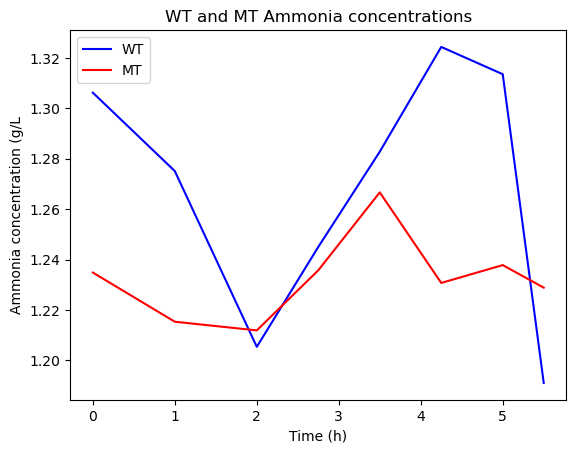

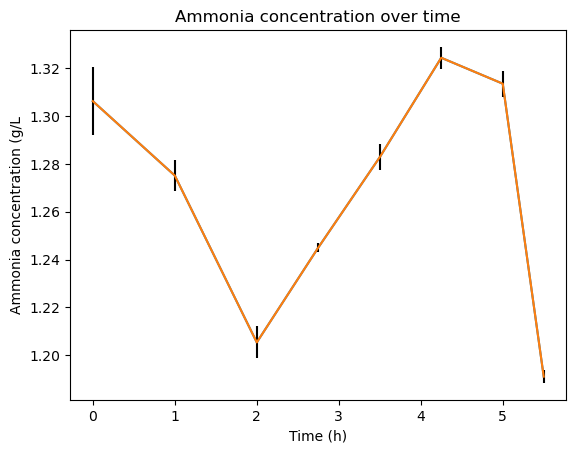

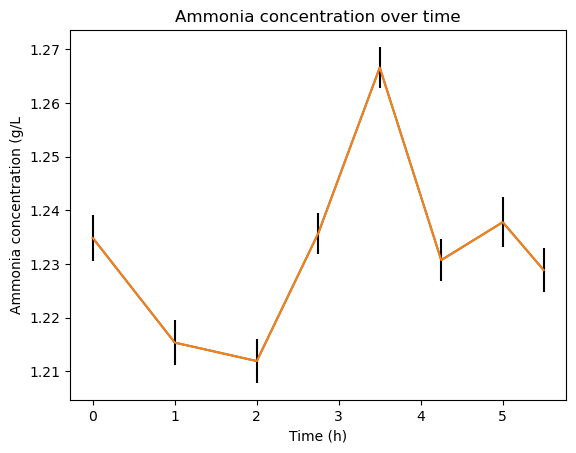

In [5]:
#plots the averages over time of combined graphs
plt.plot(time, WT_data.loc["Average"], color = 'blue', label = 'WT')
plt.plot(time, MT_data.loc["Average"], color = 'red', label = 'MT')
plt.xlabel('Time (h)')
plt.ylabel('Ammonia concentration (g/L')
plt.title('WT and MT Ammonia concentrations')
plt.legend()
plt.show()

#plots the individual graphs with linear regression
def plot_individual(type):
    plt.plot(time, type.loc["Average"])
    plt.errorbar(time, type.loc["Average"], yerr = type.loc['Std deviation'], ecolor = 'black')
   # slope, intercept = np.polyfit(time, type.loc["Average"], 1)
   # regression_line = np.poly1d([slope, intercept])
   # plt.plot(time, regression_line(time), color='red', label='Linear Regression', linestyle = '--')
   # equation = f"y = {slope:.2f}x + {intercept:.2f}"
   # plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
   # r_squared = r2_score(type.loc["Average"], regression_line(time))
    
    # Add the R-squared annotation
   # r_squared_annotation = f"R^2 = {r_squared:.2f}"
   # plt.annotate(r_squared_annotation, xy=(0.05, 0.90), xycoords='axes fraction', ha='left', va='top')
    plt.xlabel('Time (h)')
    plt.ylabel('Ammonia concentration (g/L')
    plt.title("Ammonia concentration over time")
    plt.show()
    
plot_individual(WT_data)
plot_individual(MT_data)

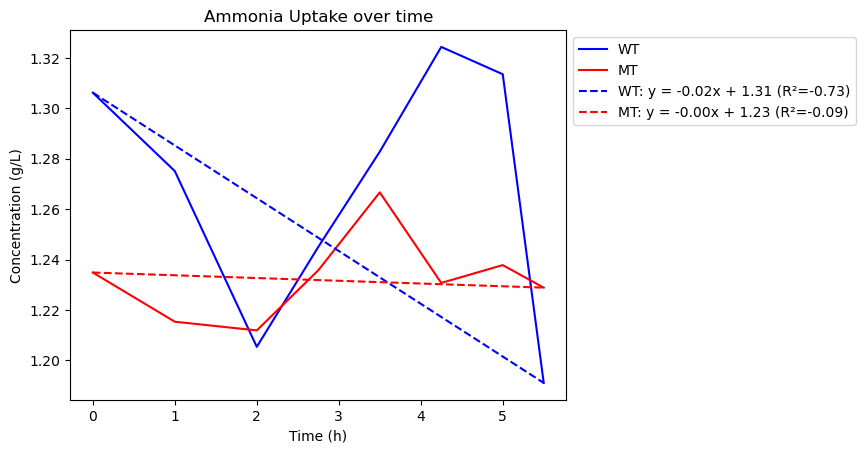

In [6]:
#calculates the substrate uptake trough plotting it and performing linear regression
def deltaS(type):
    first_point = type.loc["Average"].iloc[0]
    last_point = type.loc['Average'].iloc[-1]
    return first_point, last_point

WT_S_first, WT_S_last = deltaS(WT_data)
MT_S_first, MT_S_last = deltaS(MT_data)

#plots the data
plt.plot(time, WT_data.loc['Average'], color = 'blue', label = 'WT')
plt.plot(time, MT_data.loc['Average'], color = 'red', label = 'MT')

# Perform linear regression for WT using the first and last points
slope_WT = (WT_S_last - WT_S_first) / (time[-1] - time[0])
intercept_WT = WT_S_first - slope_WT * time[0]
line_WT = [slope_WT * t + intercept_WT for t in time]
r2_WT = r2_score(WT_data.loc['Average'], line_WT)
WT_formula = f'WT: y = {slope_WT:.2f}x + {intercept_WT:.2f} (R²={r2_WT:.2f})'
plt.plot(time, line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform linear regression for MT using the first and last points
slope_MT = (MT_S_last - MT_S_first) / (time[-1] - time[0])
intercept_MT = MT_S_first - slope_MT * time[0]
line_MT = [slope_MT * t + intercept_MT for t in time]
r2_MT = r2_score(MT_data.loc['Average'], line_MT)
MT_formula = f'MT: y = {slope_MT:.2f}x + {intercept_MT:.2f} (R²={r2_MT:.2f})' 
plt.plot(time, line_MT, color='red', linestyle='--', label= MT_formula)

plt.xlabel('Time (h)')
plt.ylabel('Concentration (g/L)')
plt.title('Ammonia Uptake over time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

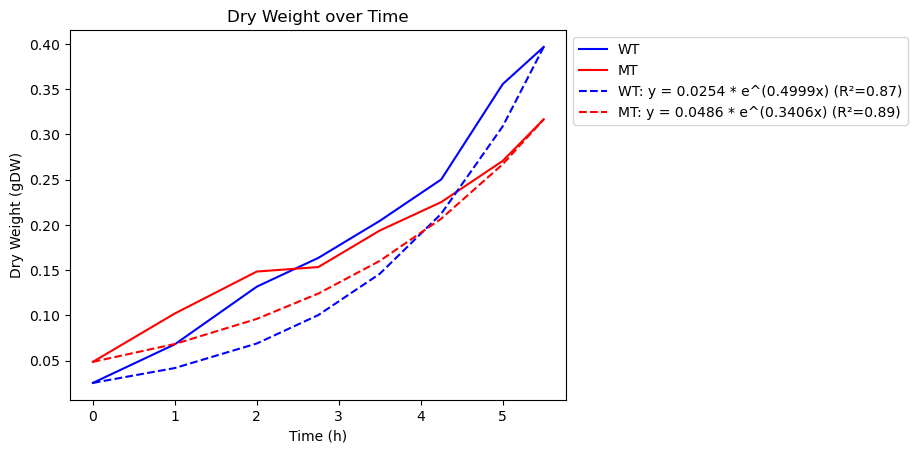

In [22]:
cellcount = pd.read_csv(r'C:\Users\gosse\Desktop\reseach project\TOM2_Cellcounts.csv', sep=';')

# Measured dry weights
WT_dryweight_measured = [0.1120, 0.1239]
MT_dryweight_measured = [0.1155, 0.1250]

# Time points
time = [0, 1, 2, 2.75, 3.5, 4.25, 5, 5.5]

def calculate_weightpercell(type, dryweight, cellcount):
    cells = cellcount[type].iloc[-1]
    convert = (dryweight[-1] - dryweight[0]) * 33.33
    weight_per_cell = convert / cells
    points = []
    for x in cellcount[type]:
        weight = x * weight_per_cell
        points.append(weight)
    return points

# Calculate weight data for WT and MT
WT_weightdata = calculate_weightpercell('WT', WT_dryweight_measured, cellcount)
MT_weightdata = calculate_weightpercell('MT', MT_dryweight_measured, cellcount)

plt.plot(time, WT_weightdata, color='blue', label='WT')
plt.plot(time, MT_weightdata, color='red', label='MT')

# Function for exponential regression using first and last points
def exponential_regression(time, values):
    first_point = values[0]
    last_point = values[-1]
    time_range = time[-1] - time[0]
    
    # Calculate growth rate using natural logarithm
    if first_point > 0 and last_point > 0:
        b = np.log(last_point / first_point) / time_range
        a = first_point
    else:
        b = 0
        a = 0
    
    # Generate exponential line
    exp_line = [a * np.exp(b * t) for t in time]
    
    return exp_line, a, b

# Perform exponential regression for WT
exp_line_WT, a_WT, b_WT = exponential_regression(time, WT_weightdata)
r2_WT = r2_score(WT_weightdata, exp_line_WT)
WT_formula = f'WT: y = {a_WT:.4f} * e^({b_WT:.4f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
exp_line_MT, a_MT, b_MT = exponential_regression(time, MT_weightdata)
r2_MT = r2_score(MT_weightdata, exp_line_MT)
MT_formula = f'MT: y = {a_MT:.4f} * e^({b_MT:.4f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Label the plot
plt.xlabel('Time (h)')
plt.ylabel('Dry Weight (gDW)')
plt.title('Dry Weight over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Yield Coefficient for WT: -3.22
Yield Coefficient for MT: -44.72


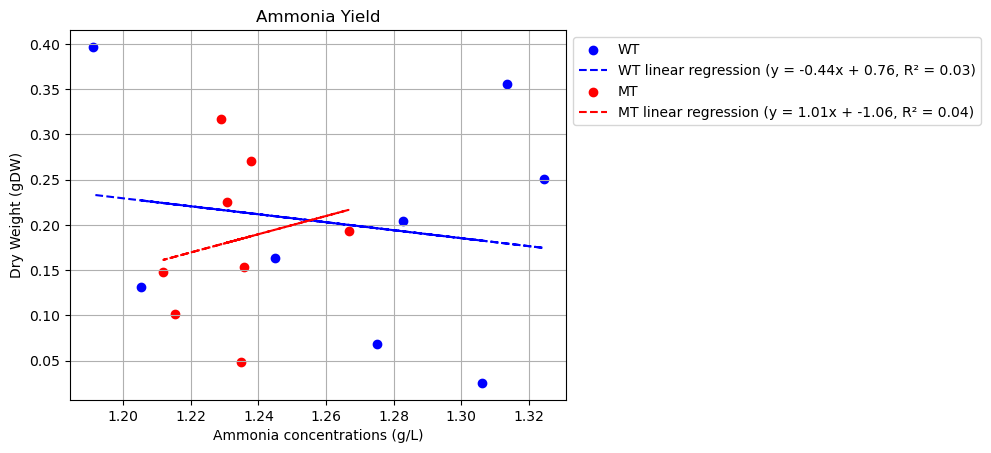

In [24]:
plt.scatter(WT_data.loc['Average'], WT_weightdata, color='blue', marker='o', label='WT')

# Perform linear regression for WT data
slope_WT, intercept_WT = np.polyfit(WT_data.loc['Average'], WT_weightdata, 1)

# Calculate R-squared value for WT data
residuals_WT = WT_weightdata - (slope_WT * WT_data.loc['Average'] + intercept_WT)
ss_res_WT = np.sum(np.square(residuals_WT))
ss_tot_WT = np.sum(np.square(WT_weightdata - np.mean(WT_weightdata)))
r_squared_WT = 1 - (ss_res_WT / ss_tot_WT)

# Plot the regression line for WT data
plt.plot(WT_data.loc['Average'], slope_WT * WT_data.loc['Average'] + intercept_WT, color='blue', linestyle='--', label=f'WT linear regression (y = {slope_WT:.2f}x + {intercept_WT:.2f}, R² = {r_squared_WT:.2f})')

# Scatter plot for MT data
plt.scatter(MT_data.loc['Average'], MT_weightdata, color='red', marker='o', label='MT')

# Perform linear regression for MT data
slope_MT, intercept_MT = np.polyfit(MT_data.loc['Average'], MT_weightdata, 1)

# Calculate R-squared value for MT data
residuals_MT = MT_weightdata - (slope_MT * MT_data.loc['Average'] + intercept_MT)
ss_res_MT = np.sum(np.square(residuals_MT))
ss_tot_MT = np.sum(np.square(MT_weightdata - np.mean(MT_weightdata)))
r_squared_MT = 1 - (ss_res_MT / ss_tot_MT)

# Plot the regression line for MT data
plt.plot(MT_data.loc['Average'], slope_MT * MT_data.loc['Average'] + intercept_MT, color='red', linestyle='--', label=f'MT linear regression (y = {slope_MT:.2f}x + {intercept_MT:.2f}, R² = {r_squared_MT:.2f})')

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Labels and title
plt.xlabel('Ammonia concentrations (g/L)')
plt.ylabel('Dry Weight (gDW)')
plt.title('Ammonia Yield')
plt.grid(True)

# Calculate yield (X) for WT and MT
initial_biomass_WT = WT_weightdata[0]
final_biomass_WT = WT_weightdata[-1]
yield_WT = final_biomass_WT - initial_biomass_WT

initial_biomass_MT = MT_weightdata[0]
final_biomass_MT = MT_weightdata[-1]
yield_MT = final_biomass_MT - initial_biomass_MT

# Assuming substrate consumed (S) is known
substrate_consumed_WT = WT_S_last - WT_S_first
substrate_consumed_MT = MT_S_last - MT_S_first

yield_coefficient_WT = yield_WT / substrate_consumed_WT
yield_coefficient_MT = yield_MT / substrate_consumed_MT

print(f'Yield Coefficient for WT: {yield_coefficient_WT:.2f}')
print(f'Yield Coefficient for MT: {yield_coefficient_MT:.2f}')

plt.show()
